# 과제2. [평가]Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [89]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()



,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명| 내용                                                                                        |구분|
|	----	|-------------------------------------------------------------------------------------------|	----	|
|	COLLEGE	| 	대학졸업 여부(1,0)	                                                                            |		|
|	INCOME	| 	연 수입액(달러)	                                                                               |		|
|	OVERAGE	| 	월 초과사용 시간(분)	                                                                            |		|
|	LEFTOVER	| 	월 사용 잔여시간(%)	                                                                            |		|
|	HOUSE	| 	집 가격(달러)	                                                                                |		|
|	HANDSET_PRICE	| 	핸드폰 가격(달러)	                                                                              |		|
|	AVERAGE_CALL_DURATION	| 	평균 통화시간(분)	                                                                              |		|
|	REPORTED_SATISFACTION	| 	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	                                |		|
|	CONSIDERING_CHANGE_OF_PLAN	| 	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	 |		|
|	**CHURN**	| 	이탈여부(1 : 이탈, 0 : 잔류)	                                                                    |	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : 만족도 설문에 불만족인 사람들이 이탈할 가능성이 높을 것이다.

* 가설2 : 소득이 높은 사람이 이탈할 가능성이 높을 것이다.

* 가설3 : 변경 계획 설문에 변경 의향이 있다는 사람들이 이탈할 가능성이 높을 것이다.

* 가설4 : 통화시간이 긴 고객이 이탈할 가능성이 높다.

* 가설5 : 핸드폰 가격에 따라 이탈의 가능성에 차이가 있을 것이다.

* 가설6 : 월 초과사용시간에 따라 이탈의 가능성에 차이가 있을 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) 연 수입액

In [90]:
val = "INCOME"

In [91]:
print("Nan:",mobile[val].isna().sum())
print("Nan percent: {:.2f}".format(mobile[val].isna().sum()/len(mobile)))

Nan: 0
Nan percent: 0.00


In [92]:
mobile[val].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

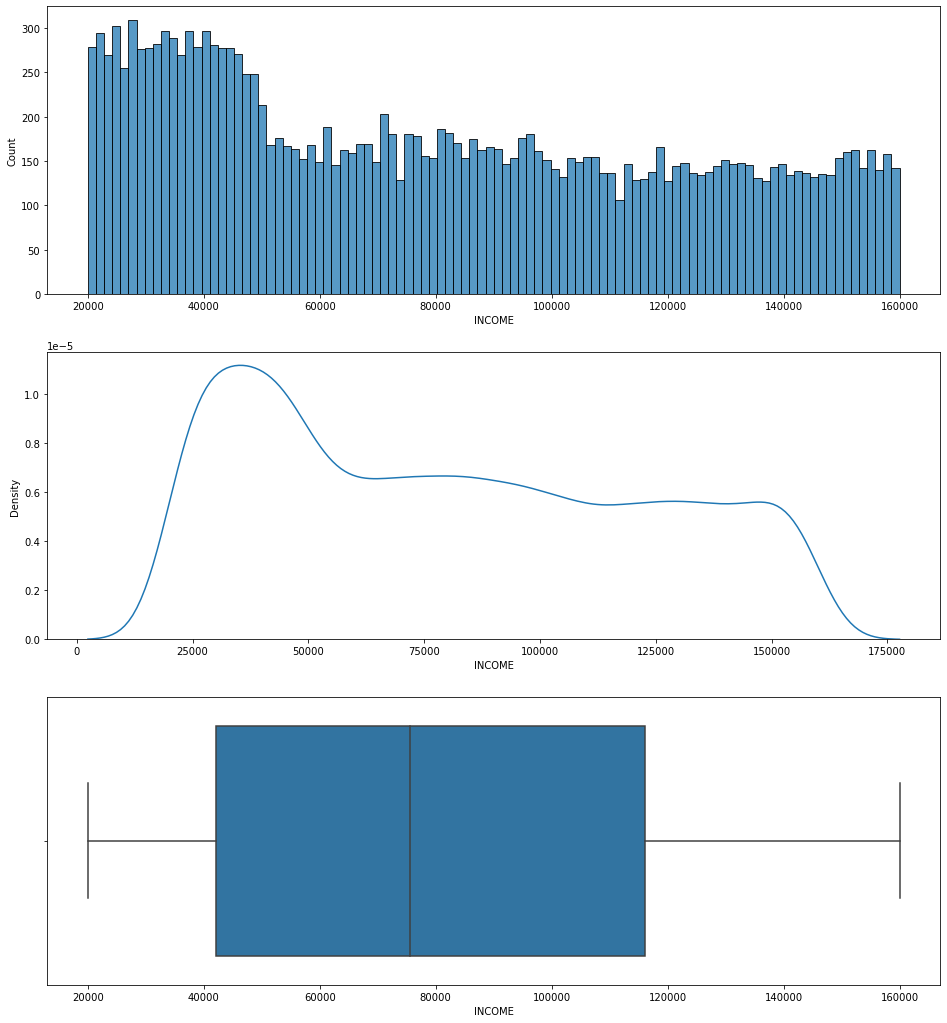

In [93]:
plt.figure(figsize=(16, 18))

plt.subplot(3, 1, 1)
sns.histplot(data=mobile, x=val, bins=100)
plt.subplot(3, 1, 2)
sns.kdeplot(data=mobile, x=val)
plt.subplot(3, 1, 3)
sns.boxplot(data=mobile, x=val)
plt.show()

### 2) 월 초과사용 시간

In [94]:
val = "OVERAGE"

In [95]:
print("Nan:",mobile[val].isna().sum())
print("Nan percent: {:.2f}".format(mobile[val].isna().sum()/len(mobile)))

Nan: 0
Nan percent: 0.00


In [96]:
mobile[val].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

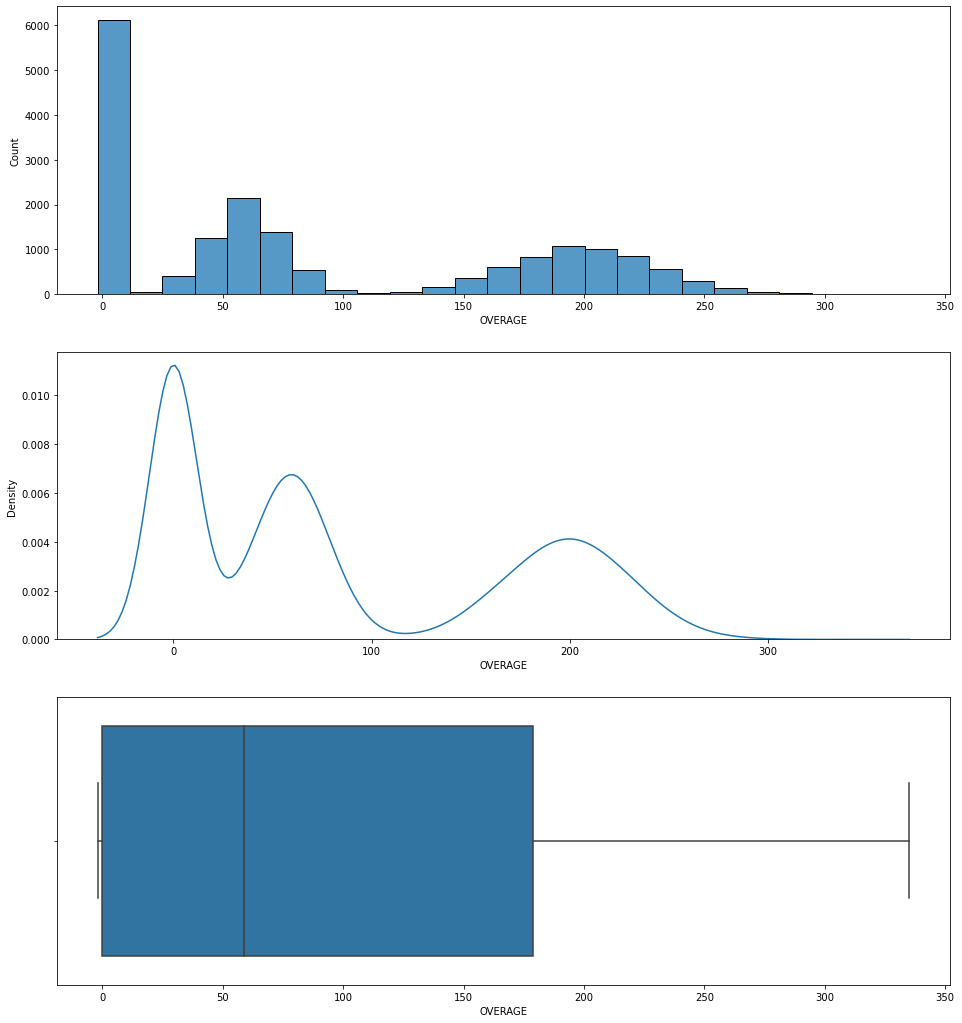

In [97]:
plt.figure(figsize=(16, 18))

plt.subplot(3, 1, 1)
sns.histplot(data=mobile, x=val)
plt.subplot(3, 1, 2)
sns.kdeplot(data=mobile, x=val)
plt.subplot(3, 1, 3)
sns.boxplot(data=mobile, x=val)
plt.show()

* 월 초과사용량의 최소값이 0보다 작은 값이 존재한다. 이는 단순한 이상치인지, 아니면 다른 의미가 있는 것인지 확인 필요
* 대부분의 월 초과사용량은 0에 가깝지만, 두개의 봉우리가 보여, 월 초과사용량을 구간으로 나누어서 분석

### 3) HOUSE

In [98]:
val = "HOUSE"

In [99]:
print("Nan:",mobile[val].isna().sum())
print("Nan percent: {:.2f}".format(mobile[val].isna().sum()/len(mobile)))

Nan: 215
Nan percent: 0.01


* 이상치의 개수는 215이지만, 그 비율은 대략 0.01%이다.
* 이상치를 삭제 혹은 대치에 대한 판단 필요

In [100]:
mobile[val].describe()

count     17785.000000
mean     492950.532696
std      252175.173507
min      150015.000000
25%      263876.000000
50%      452277.000000
75%      701460.000000
max      999970.000000
Name: HOUSE, dtype: float64

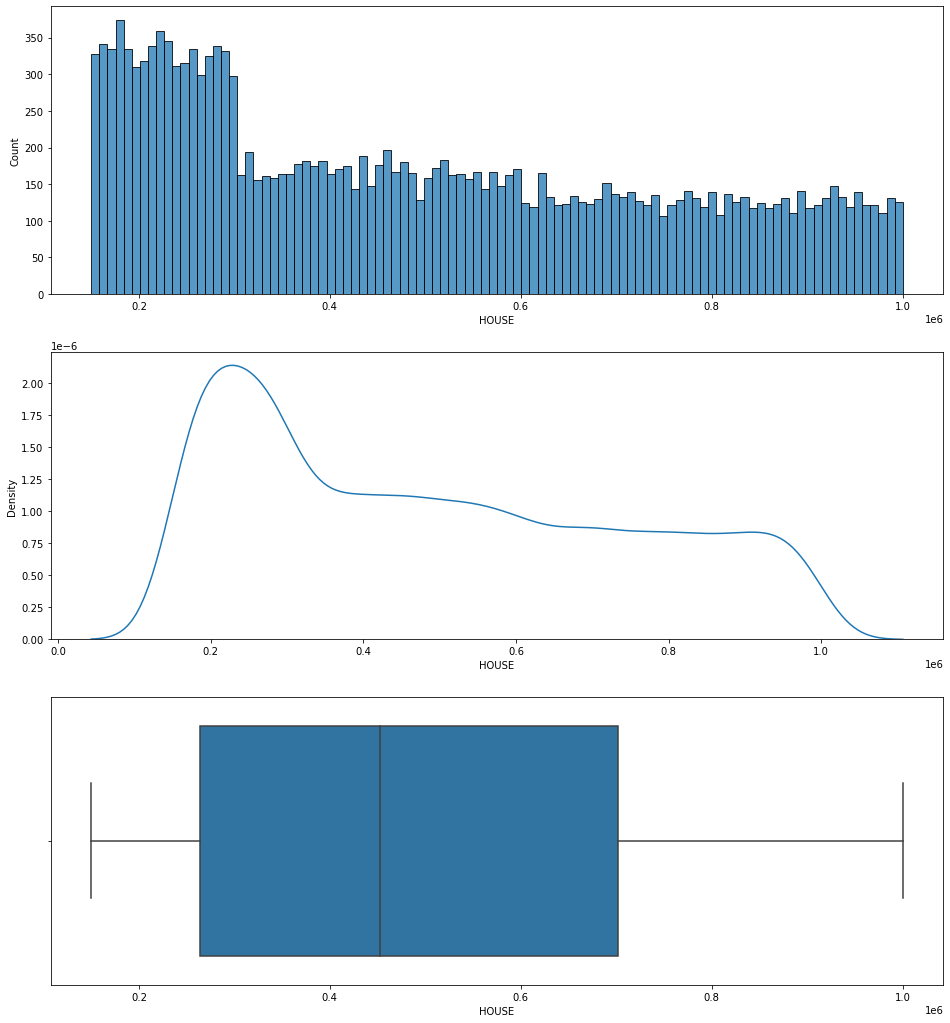

In [101]:
plt.figure(figsize=(16, 18))

plt.subplot(3, 1, 1)
sns.histplot(data=mobile, x=val, bins=100)
plt.subplot(3, 1, 2)
sns.kdeplot(data=mobile, x=val)
plt.subplot(3, 1, 3)
sns.boxplot(data=mobile, x=val)
plt.show()

* 연 수입액의 분포와 상당히 유사해보인다.
* 상관관계를 파악하고 만약 강한 상관관계가 있다면, 두가지 변수중 하나만 사용

### 4) HANDSET_PRICE

In [102]:
val = "HANDSET_PRICE"

In [103]:
print("Nan:",mobile[val].isna().sum())
print("Nan percent: {:.2f}".format(mobile[val].isna().sum()/len(mobile)))

Nan: 0
Nan percent: 0.00


In [104]:
mobile[val].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

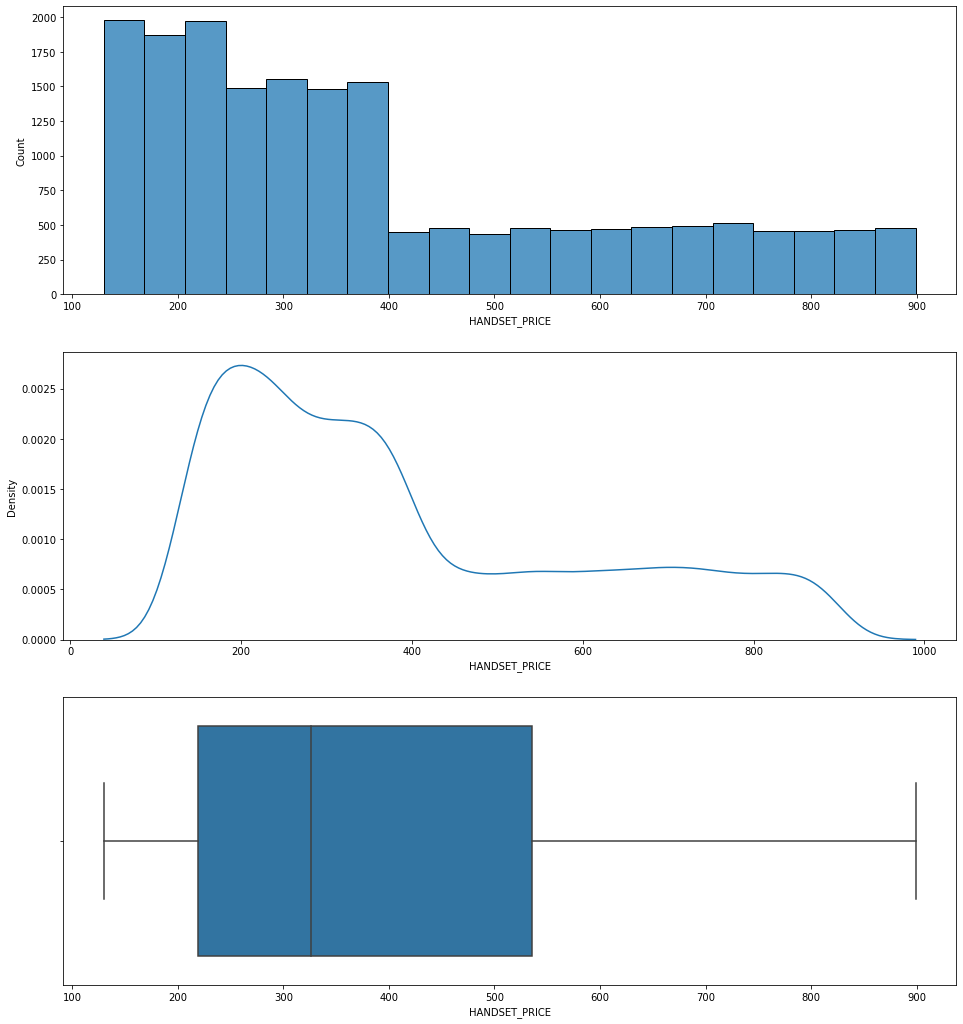

In [105]:
plt.figure(figsize=(16, 18))

plt.subplot(3, 1, 1)
sns.histplot(data=mobile, x=val, bins=20)
plt.subplot(3, 1, 2)
sns.kdeplot(data=mobile, x=val)
plt.subplot(3, 1, 3)
sns.boxplot(data=mobile, x=val)
plt.show()

* 사람들의 대부분이 휴대폰 가격의 평균보다 저렴한 휴대폰을 소유하고 있다.

### 5) REPORTED_SATISFACTION

In [106]:
val = "REPORTED_SATISFACTION"

In [107]:
print("Nan:",mobile[val].isna().sum())
print("Nan percent: {:.3f}".format(mobile[val].isna().sum()/len(mobile)))

Nan: 38
Nan percent: 0.002


* 결측치의 개수는 38개 이고 그 비율은 0.002%로 0에 가깝다.
* 결측치에 대해 삭제 혹은 대치 할지 판단 필요

In [108]:
mobile[val].value_counts()

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64

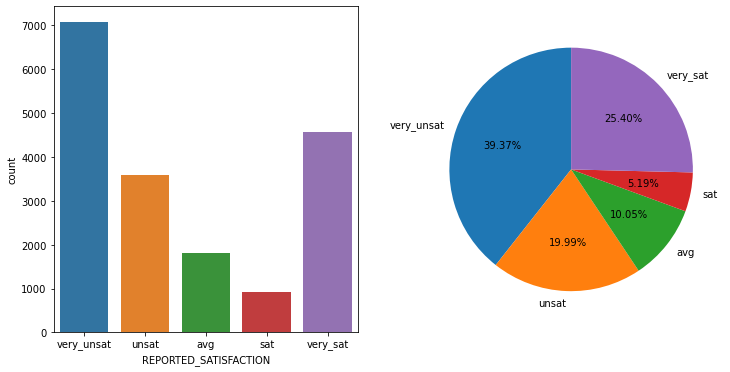

In [109]:
plt.figure(figsize=(12, 6))

rIndex = ["very_unsat", "unsat", "avg", "sat", "very_sat"]
data=mobile[val].value_counts()
data = data.reindex(rIndex)

plt.subplot(1, 2, 1)
sns.countplot(data=mobile, x=val, order=rIndex)

plt.subplot(1, 2, 2)
plt.pie(data, autopct="%.2f%%", startangle=90.0, labels=data.index)
plt.show()

* 매우 불만족인 고객이 매우 만족인 고객보다 월등히 많다
* 이러한 설문 결과가 나온 이유를 찾아야 할 필요가 있다.

* 5가지인 범주를 3가지의 범주(불만족, 보통, 만족)으로 나누어 분석

### 6) CONSIDERING_CHANGE_OF_PLAN

In [110]:
val = "CONSIDERING_CHANGE_OF_PLAN"

In [111]:
print("Nan:",mobile[val].isna().sum())
print("Nan percent: {:.3f}".format(mobile[val].isna().sum()/len(mobile)))

Nan: 0
Nan percent: 0.000


In [112]:
mobile[val].value_counts()

considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64

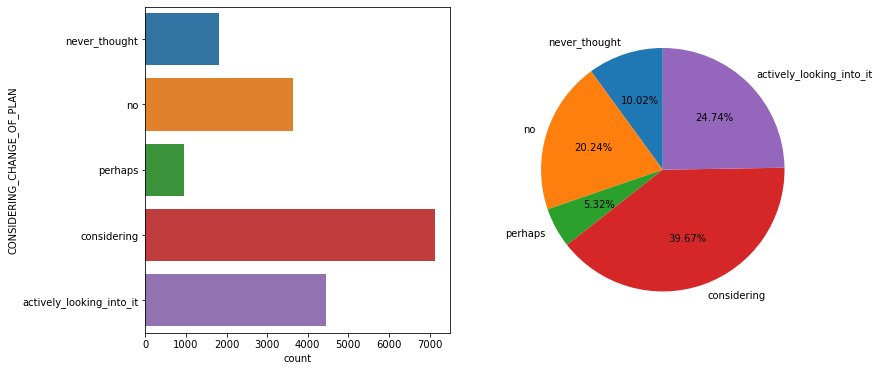

In [113]:
plt.figure(figsize=(12, 6))

rIndex = ["never_thought", "no", "perhaps", "considering", "actively_looking_into_it"]
data=mobile[val].value_counts()
data = data.reindex(rIndex)


plt.subplot(1, 2, 1)
sns.countplot(data=mobile, y=val, order=rIndex)

plt.subplot(1, 2, 2)
plt.pie(data, autopct="%.2f%%", startangle=90.0, labels=data.index)
plt.show()

* no라는 설문보다 적극적으로 찾고있다가 월등히 높다
* 이러한 설문 결과가 나온 이유를 찾아야 할 필요가 있다.

* 5가지인 범주를 3가지의 범주(생각없음, 보통, 고려중)으로 나누어 분석

### 7) CHURN(target)

In [114]:
val = "CHURN"

In [115]:
print("Nan:",mobile[val].isna().sum())
print("Nan percent: {:.3f}".format(mobile[val].isna().sum()/len(mobile)))

Nan: 0
Nan percent: 0.000


In [116]:
mobile[val].value_counts()

0    9131
1    8869
Name: CHURN, dtype: int64

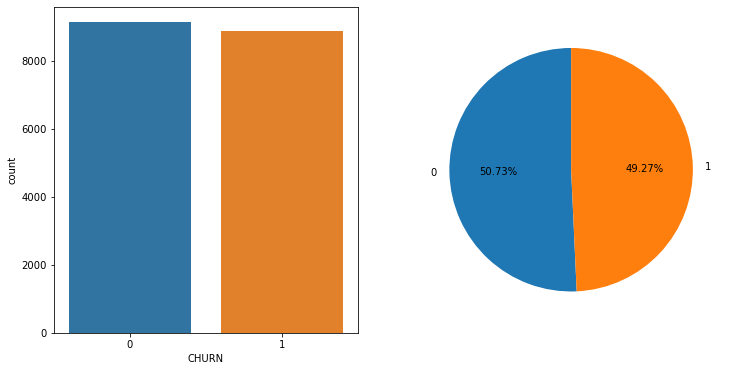

In [117]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=mobile, x=val)

plt.subplot(1, 2, 2)
data=mobile[val].value_counts()
plt.pie(data, autopct="%.2f%%", startangle=90.0, labels=data.index)
plt.show()

* 고객의 이탈 비율에는 큰 차이가 없다.
* 미세하게 탈퇴가 더 낮다.

### 8) 추가1

In [118]:
val = "COLLEGE"

In [119]:
print("Nan:",mobile[val].isna().sum())
print("Nan percent: {:.3f}".format(mobile[val].isna().sum()/len(mobile)))

Nan: 0
Nan percent: 0.000


In [120]:
mobile[val].value_counts()

1    9049
0    8951
Name: COLLEGE, dtype: int64

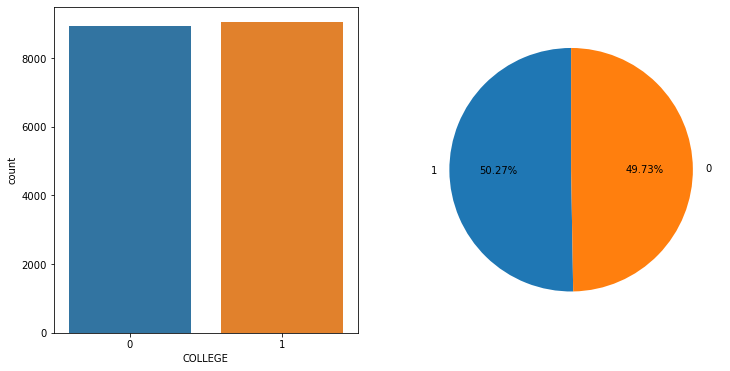

In [121]:
plt.figure(figsize=(12, 6))
data=mobile[val].value_counts()

plt.subplot(1, 2, 1)
sns.countplot(data=mobile, x=val)

plt.subplot(1, 2, 2)
plt.pie(data, autopct="%.2f%%", startangle=90.0, labels=data.index)
plt.show()

* 대졸의 비율은 반반이다.

* 대학졸업의 여부와 연 수입액 상관관계확인

### 9) 추가2

In [122]:
val = "LEFTOVER"

In [123]:
print("Nan:",mobile[val].isna().sum())
print("Nan percent: {:.2f}".format(mobile[val].isna().sum()/len(mobile)))

Nan: 0
Nan percent: 0.00


In [124]:
mobile[val].describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

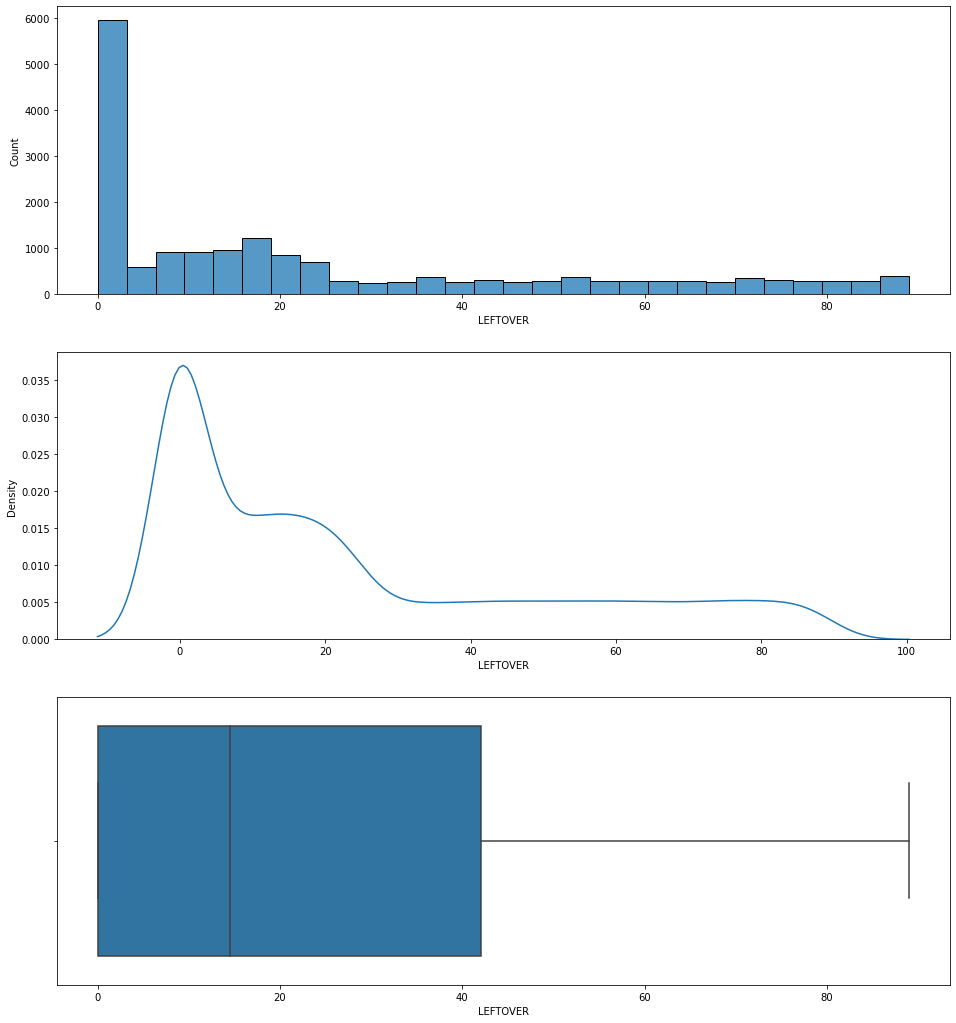

In [125]:
plt.figure(figsize=(16, 18))

plt.subplot(3, 1, 1)
sns.histplot(data=mobile, x=val)
plt.subplot(3, 1, 2)
sns.kdeplot(data=mobile, x=val)
plt.subplot(3, 1, 3)
sns.boxplot(data=mobile, x=val)
plt.show()

* 사람들의 대부분이 월 사용 잔여시간을 다 사용한다.
* 사람들이 자기 자신에게 맞는 요금을 사용한다.

### 10) 추가3

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [126]:
target="CHURN"
target_mean = mobile[target].mean()

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) REPORTED_SATISFACTION --> CHURN

In [127]:
val = "REPORTED_SATISFACTION"

In [128]:
table = pd.crosstab(mobile[val], mobile[target], normalize="index")
rIndex = ["very_unsat", "unsat", "avg", "sat", "very_sat"]
table = table.reindex(rIndex)
print(table)

CHURN                         0         1
REPORTED_SATISFACTION                    
very_unsat             0.500990  0.499010
unsat                  0.499164  0.500836
avg                    0.527132  0.472868
sat                    0.527897  0.472103
very_sat               0.511618  0.488382


<Figure size 576x864 with 0 Axes>

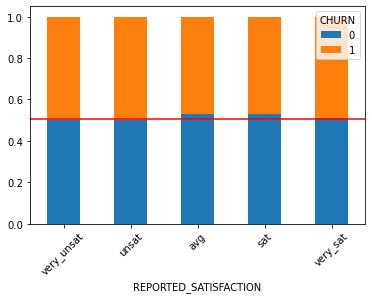

In [129]:
plt.figure(figsize=(8, 12))
table.plot.bar(stacked=True)
plt.axhline(1-target_mean, color='r')
plt.xticks(rotation=45)
plt.show()

In [130]:
table = pd.crosstab(mobile[val], mobile[target])

chi2 = spst.chi2_contingency(table)
print(f'카이제곱통계량 {chi2[0]:.5f}  p-value : {chi2[1]}')

카이제곱통계량 6.84110  p-value : 0.14452738878905058


* p-value가 유의 수준 0.05보다 크기에 대립가설("만족도 설문조사와 고객이탈과 관계있다.")를 기각하고 귀무가설 채택.
* 하지만 큰 차이가 있다고 보여지지 않습니다.
* 5개의 범주가 아닌 3개의 범주로 나눠서 확인

#### 2) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [131]:
val = "CONSIDERING_CHANGE_OF_PLAN"

In [132]:
table = pd.crosstab(mobile[val], mobile[target], normalize="index")
rIndex = ["never_thought", "no", "perhaps", "considering", "actively_looking_into_it"]
table = table.reindex(rIndex)
print(table)

CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
never_thought               0.513304  0.486696
no                          0.500274  0.499726
perhaps                     0.475992  0.524008
considering                 0.510853  0.489147
actively_looking_into_it    0.511565  0.488435


<Figure size 576x864 with 0 Axes>

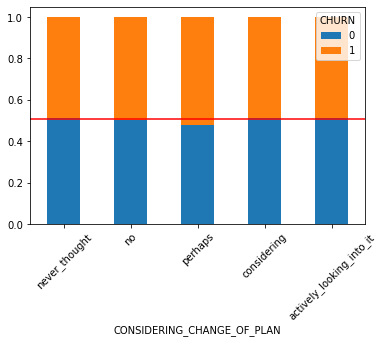

In [133]:
plt.figure(figsize=(8, 12))
table.plot.bar(stacked=True)
plt.axhline(1-target_mean, color='r')
plt.xticks(rotation=45)
plt.show()

In [134]:
table = pd.crosstab(mobile[val], mobile[target])

chi2 = spst.chi2_contingency(table)
print(f'카이제곱통계량 {chi2[0]:.5f}  p-value : {chi2[1]}')

카이제곱통계량 5.42143  p-value : 0.24672225866799702


* p-value가 유의 수준 0.05보다 크기에 대립가설("만족도 설문조사와 고객이탈과 관계있다.")를 기각하고 귀무가설 채택.
* 5개의 범주가 아닌 3개의 범주로 나눠서 확인

#### 3) COLLEGE --> CHURN

In [135]:
val = "COLLEGE"

In [136]:
table = pd.crosstab(mobile[val], mobile[target], normalize="index")
print(table)

CHURN           0         1
COLLEGE                    
0        0.515697  0.484303
1        0.498950  0.501050


<Figure size 576x864 with 0 Axes>

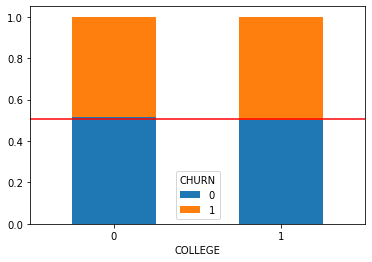

In [137]:
plt.figure(figsize=(8, 12))
table.plot.bar(stacked=True)
plt.axhline(1-target_mean, color='r')
plt.xticks(rotation=0)
plt.show()

In [138]:
table = pd.crosstab(mobile[val], mobile[target])

chi2 = spst.chi2_contingency(table)
print(f'카이제곱통계량 {chi2[0]:.5f}  p-value : {chi2[1]}')

카이제곱통계량 4.98210  p-value : 0.02561083347822053


* p-value가 유의 수준 0.05보다 작기에 귀무가설을 기각하고 대립가설을 채택
* 하지만 큰 차이가 있다고 보여지지 않습니다.

#### 4) feature --> CHURN

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN


In [139]:
val = "INCOME"

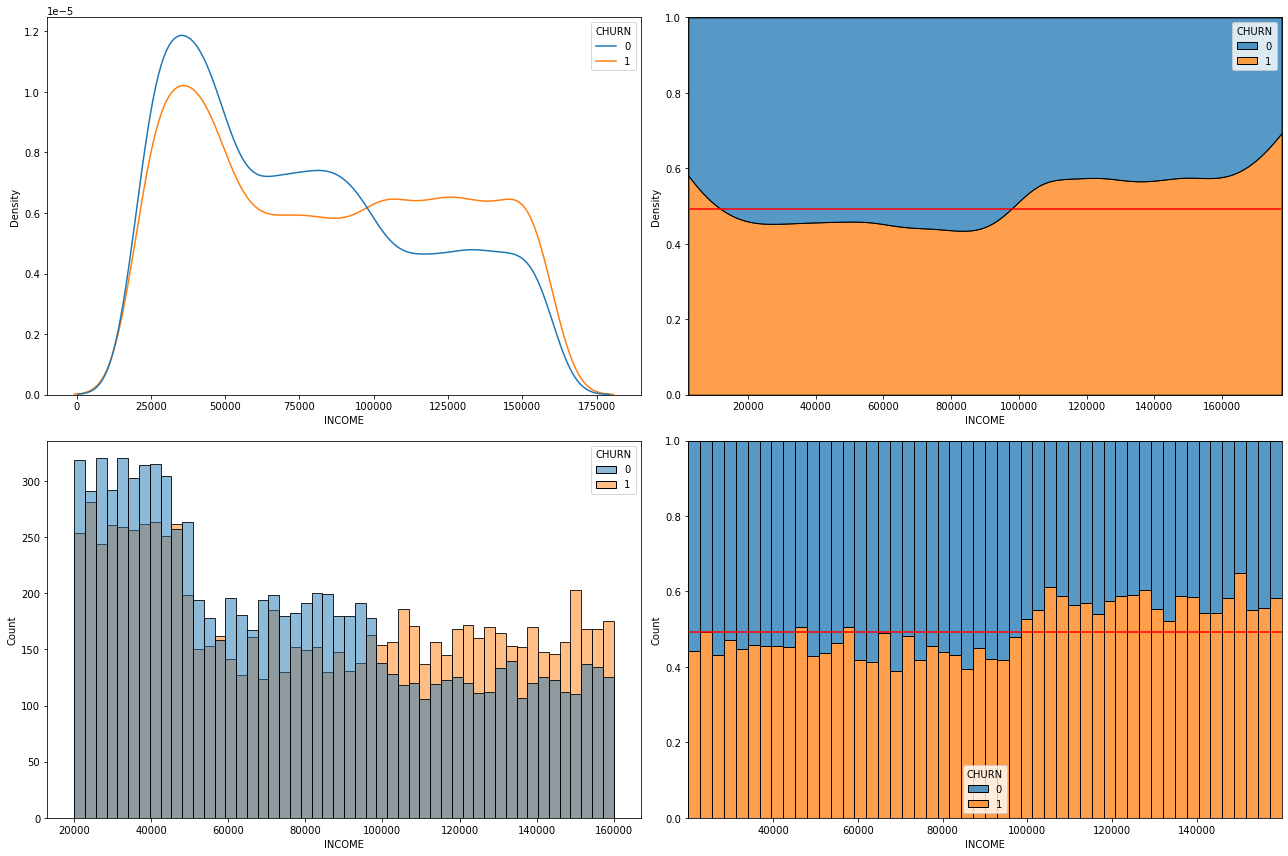

In [140]:
plt.figure(figsize= (18,12))

plt.subplot(2,2,1)
sns.kdeplot(data = mobile, x=val, hue=target,common_norm=False)

plt.subplot(2,2,2)
sns.kdeplot(data = mobile, x=val, hue=target, multiple='fill')
plt.axhline(target_mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data = mobile, x=val , hue=target, bins = 50)

plt.subplot(2,2,4)
sns.histplot(data = mobile, x=val , hue=target, bins = 50, multiple='fill')
plt.axhline(target_mean, color='r')

plt.tight_layout()
plt.show()

In [141]:
model = sm.Logit(mobile[target], mobile[val])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


* p-value가 유의 수준 0.05보다 작기에 귀무가설을 기각하고 대립가설인 "연 수입액과 고객이탈에 차이가 있다"를 한다.
* 연 수입액이 특정기준보다 높을 경우 이탈률이 높아진다.
* 이탈률이 높아지는 기준에서 두개의 구간으로 나누어서 분석 진행

#### 2) HOUSE --> CHURN


In [142]:
val = "HOUSE"

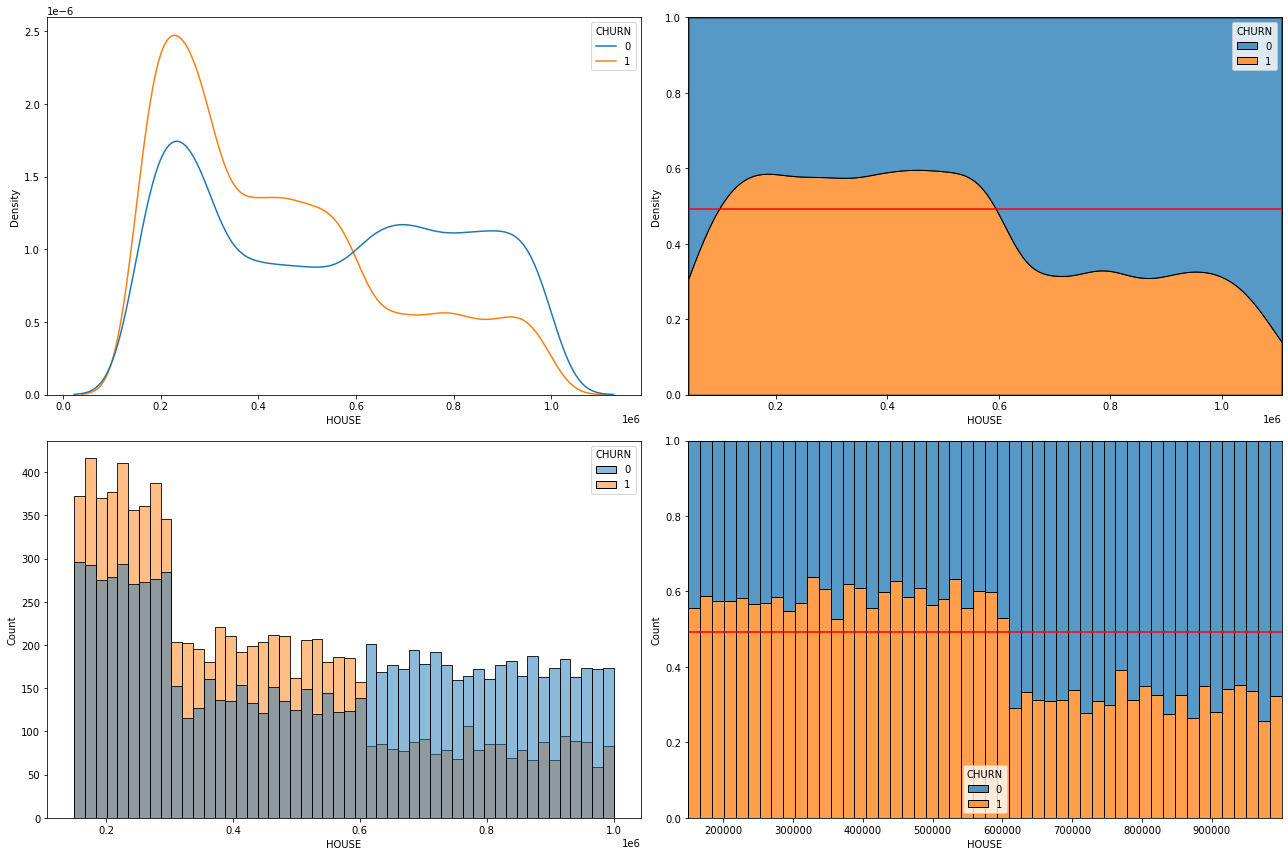

In [143]:
plt.figure(figsize= (18,12))

plt.subplot(2,2,1)
sns.kdeplot(data = mobile, x=val, hue=target,common_norm=False)

plt.subplot(2,2,2)
sns.kdeplot(data = mobile, x=val, hue=target, multiple='fill')
plt.axhline(target_mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data = mobile, x=val , hue=target, bins = 50)

plt.subplot(2,2,4)
sns.histplot(data = mobile, x=val , hue=target, bins = 50, multiple='fill')
plt.axhline(target_mean, color='r')

plt.tight_layout()
plt.show()

In [144]:
model = sm.Logit(mobile[target], mobile[val].notnull())
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693055
         Iterations 3
HOUSE    0.068444
dtype: float64


* p-value가 유의 수준 0.05보다 크기에 대립가설을 기각하고 귀무가설인 "집 가격과 고객이탈에 차이가 없다"를 채택
* 집 가격이 특정기준보다 높을 경우 이탈률이 낮아진다.
* 이탈률이 낮아지는 기준에서 두개의 구간으로 나누어서 분석 진행

#### 3) OVERRAGE --> CHURN


In [145]:
val = "OVERAGE"

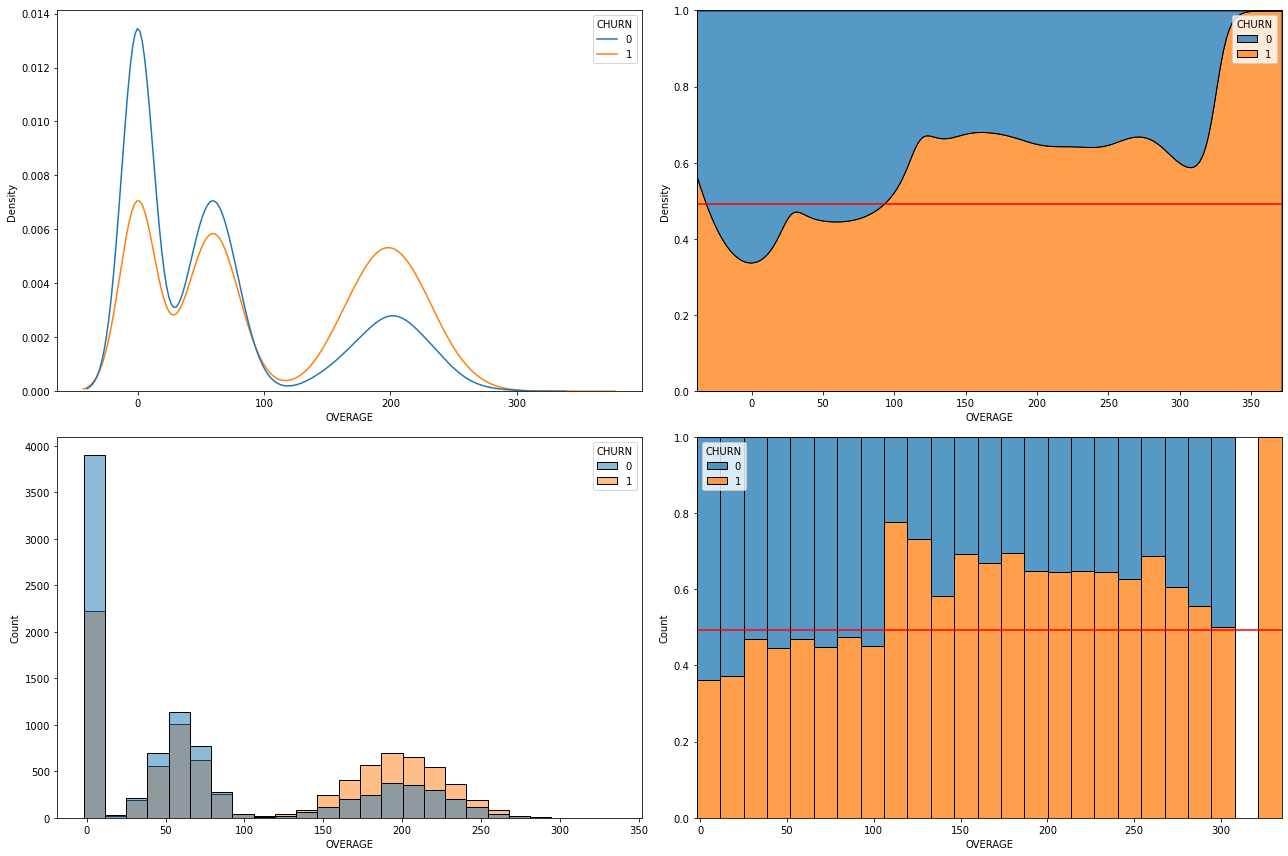

In [146]:
plt.figure(figsize= (18,12))

plt.subplot(2,2,1)
sns.kdeplot(data = mobile, x=val, hue=target,common_norm=False)

plt.subplot(2,2,2)
sns.kdeplot(data = mobile, x=val, hue=target, multiple='fill')
plt.axhline(target_mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data = mobile, x=val , hue=target)

plt.subplot(2,2,4)
sns.histplot(data = mobile, x=val , hue=target, multiple='fill')
plt.axhline(target_mean, color='r')

plt.tight_layout()
plt.show()

In [147]:
model = sm.Logit(mobile[target], mobile[val].notnull())
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693041
         Iterations 3
OVERAGE    0.050848
dtype: float64


* p-value가 유의 수준 0.05와 근사하다.
* 초과사용량을 2~3개의 구간으로 나누어 분석이 필요해보인다.

#### 4) HANDSET_PRICE --> CHURN


In [148]:
val = "HANDSET_PRICE"

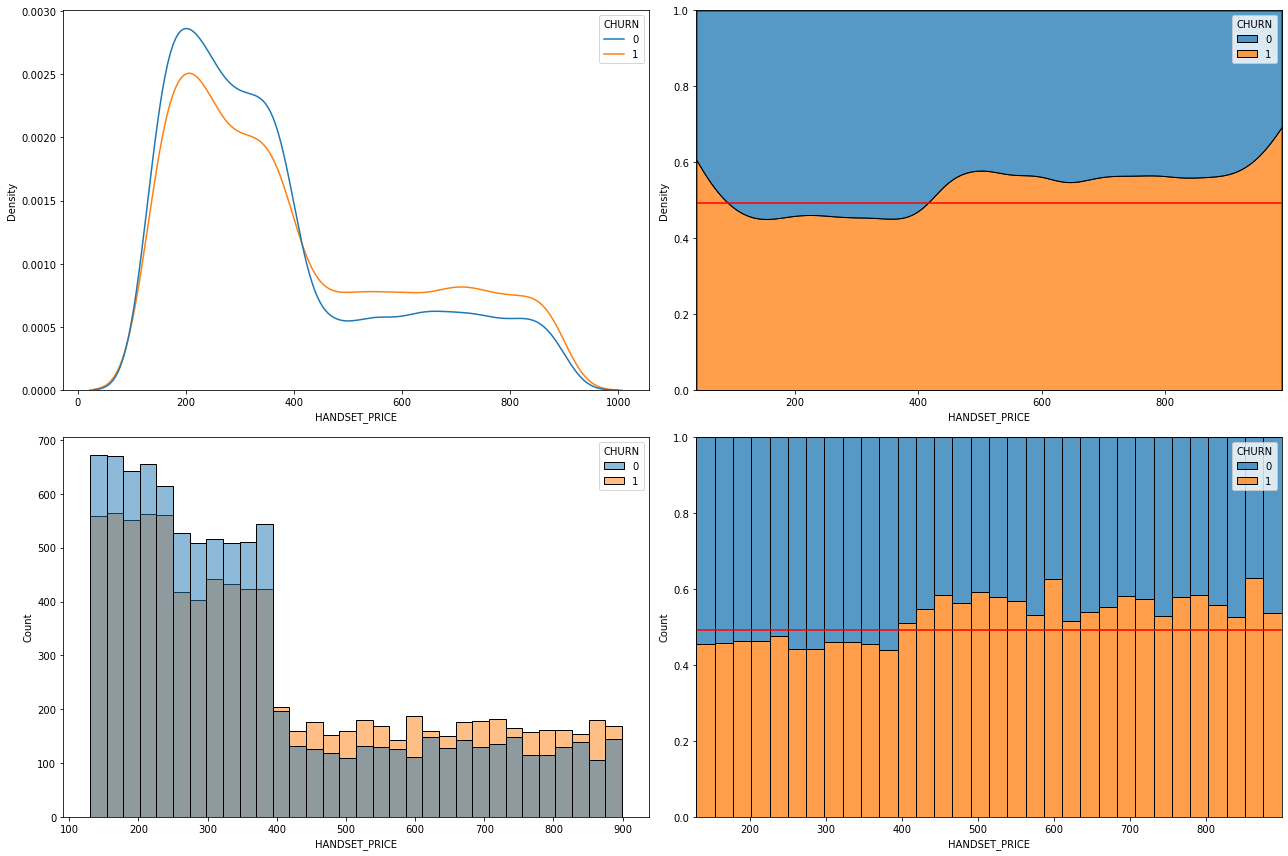

In [149]:
plt.figure(figsize= (18,12))

plt.subplot(2,2,1)
sns.kdeplot(data = mobile, x=val, hue=target,common_norm=False)

plt.subplot(2,2,2)
sns.kdeplot(data = mobile, x=val, hue=target, multiple='fill')
plt.axhline(target_mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data = mobile, x=val , hue=target)

plt.subplot(2,2,4)
sns.histplot(data = mobile, x=val , hue=target, multiple='fill')
plt.axhline(target_mean, color='r')

plt.tight_layout()
plt.show()

In [150]:
model = sm.Logit(mobile[target], mobile[val].notnull())
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693041
         Iterations 3
HANDSET_PRICE    0.050848
dtype: float64


* p-value가 유의 수준 0.05와 근사하다.
* 휴대폰 가격을 2~3개의 구간으로 나누어 분석이 필요해보인다.

#### 5) LEFTOVER --> CHURN


In [151]:
val = "LEFTOVER"

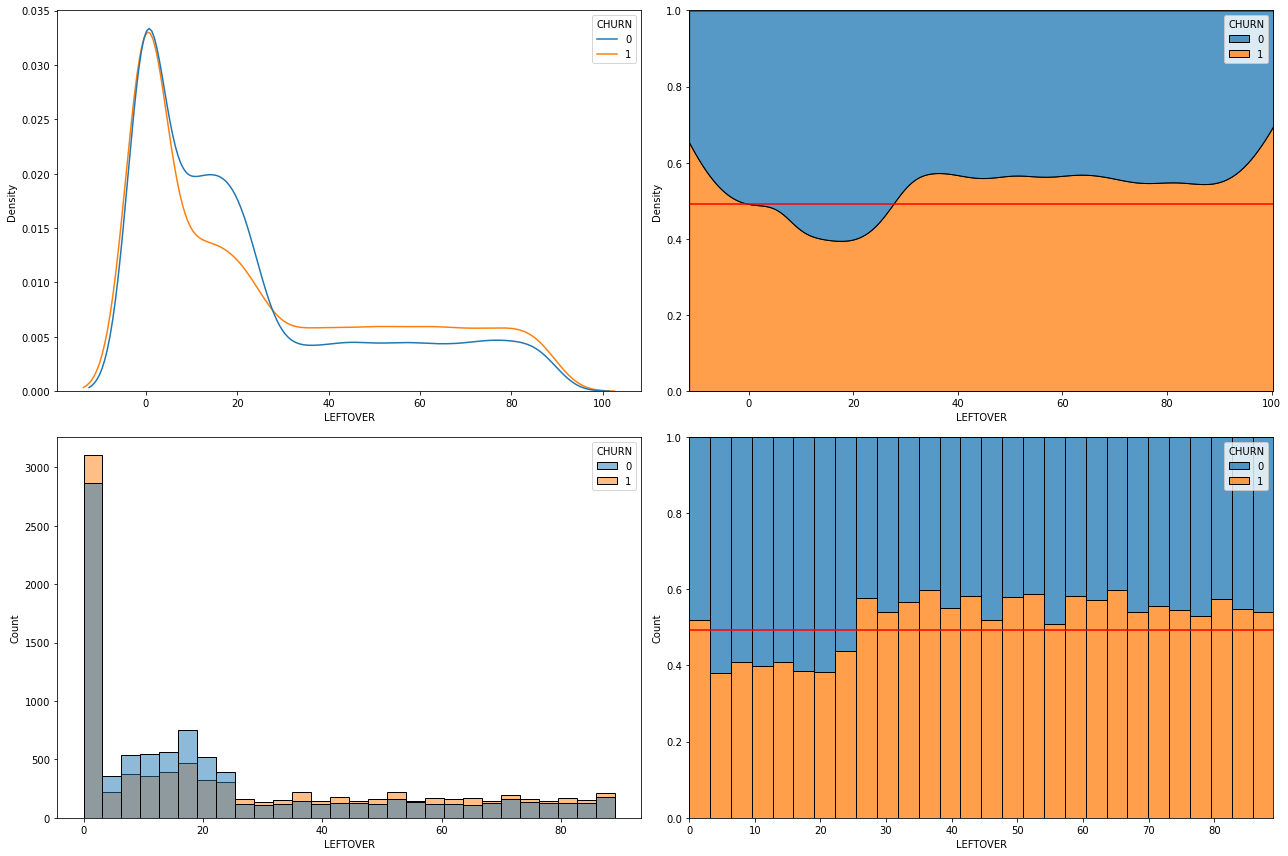

In [152]:
plt.figure(figsize= (18,12))

plt.subplot(2,2,1)
sns.kdeplot(data = mobile, x=val, hue=target,common_norm=False)

plt.subplot(2,2,2)
sns.kdeplot(data = mobile, x=val, hue=target, multiple='fill')
plt.axhline(target_mean, color='r')

plt.subplot(2,2,3)
sns.histplot(data = mobile, x=val , hue=target)

plt.subplot(2,2,4)
sns.histplot(data = mobile, x=val , hue=target, multiple='fill')
plt.axhline(target_mean, color='r')

plt.tight_layout()
plt.show()

In [153]:
model = sm.Logit(mobile[target], mobile[val].notnull())
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693041
         Iterations 3
LEFTOVER    0.050848
dtype: float64


* p-value가 유의 수준 0.05와 근사하다.
* 2~3개의 구간으로 나누어 분석이 필요해보인다.

## 4.관계 정리

### 1) 강한관계의 변수

* INCOME

### 2) 약한관계의 변수

* COLLEGE
* OVERAGE
* HANDSET_PRICE

### 3) 관계 없음

* REPORTED_SATISFACTION
* CONSIDERING_CHANGE_OF_PLAN
* HOUSE
* LEFTOVER

## 5.추가 분석

# 1) INCOME_CUT

In [154]:
val = "INCOME"

In [155]:
income_cut = [0, 100000, np.inf]

mobile["INCOME_CUT"] = pd.cut(mobile[val], bins=income_cut, labels=["under", "over"], right=False)

CHURN              0         1
INCOME_CUT                    
under       0.548937  0.451063
over        0.425947  0.574053


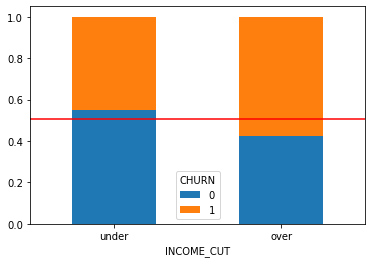

In [156]:
table = pd.crosstab(mobile["INCOME_CUT"], mobile[target], normalize="index")
print(table)
table.plot.bar(stacked=True)
plt.axhline(1-target_mean, color='r')
plt.xticks(rotation=0)

plt.show()

In [157]:
table = pd.crosstab(mobile["INCOME_CUT"], mobile[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 243.50948, p-value : 6.753130507282287e-55


* 구간을 나누지 않았을 때 보다 강한상관관계이다.

# 2) HOUSE_CUT

In [158]:
val = "HOUSE"

In [159]:
house_cut = [0, 600000, np.inf]

mobile["HOUSE_CUT"] = pd.cut(mobile[val], bins=house_cut, labels=["under", "over"], right=False)

CHURN             0         1
HOUSE_CUT                    
under      0.417056  0.582944
over       0.682105  0.317895


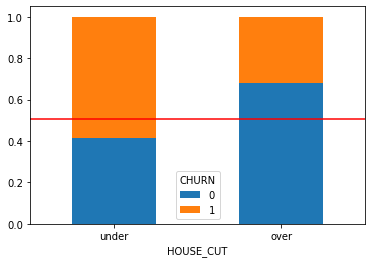

In [160]:
table = pd.crosstab(mobile["HOUSE_CUT"], mobile[target], normalize="index")
print(table)
table.plot.bar(stacked=True)
plt.axhline(1-target_mean, color='r')
plt.xticks(rotation=0)

plt.show()

In [161]:
table = pd.crosstab(mobile["HOUSE_CUT"], mobile[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 1118.55111, p-value : 3.0685813276432754e-245


* 구간을 나누지 않았을 때 보다 강한상관관계이다.

# 3) OVERAGE_CUT

In [162]:
val = "OVERAGE"

In [163]:
overage_cut = [0, 100, np.inf]

mobile["OVERAGE_CUT"] = pd.cut(mobile[val], bins=overage_cut, labels=["under", "over"], right=False)

CHURN               0         1
OVERAGE_CUT                    
under        0.590153  0.409847
over         0.342942  0.657058


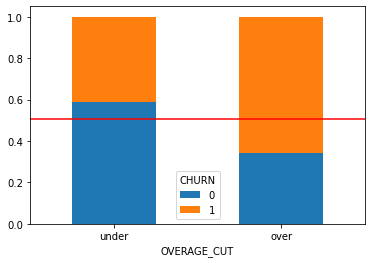

In [164]:
table = pd.crosstab(mobile["OVERAGE_CUT"], mobile[target], normalize="index")
print(table)
table.plot.bar(stacked=True)
plt.axhline(1-target_mean, color='r')
plt.xticks(rotation=0)

plt.show()

In [165]:
table = pd.crosstab(mobile["OVERAGE_CUT"], mobile[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 979.91529, p-value : 4.1687130849393353e-215


* 구간을 나누지 않았을 때 보다 강한상관관계이다.

# 4) HANDSET_PRICE_CUT

In [166]:
val = "HANDSET_PRICE"

In [167]:
handset_cut = [0, 400, np.inf]

mobile["HANDSET_PRICE_CUT"] = pd.cut(mobile[val], bins=handset_cut, labels=["under", "over"], right=False)

CHURN                     0         1
HANDSET_PRICE_CUT                    
under              0.543871  0.456129
over               0.436120  0.563880


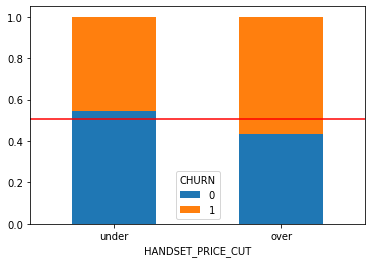

In [168]:
table = pd.crosstab(mobile["HANDSET_PRICE_CUT"], mobile[target], normalize="index")
print(table)
table.plot.bar(stacked=True)
plt.axhline(1-target_mean, color='r')
plt.xticks(rotation=0)

plt.show()

In [169]:
table = pd.crosstab(mobile["HANDSET_PRICE_CUT"], mobile[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 187.09214, p-value : 1.3711320809836095e-42


* 구간을 나누지 않았을 때 보다 강한상관관계이다.

# 5) LEFTOVER_CUT

In [170]:
val = "LEFTOVER"

In [171]:
leftover_cut = [0, 25, np.inf]

mobile["LEFTOVER_CUT"] = pd.cut(mobile[val], bins=leftover_cut, labels=["under", "over"], right=False)

CHURN                0         1
LEFTOVER_CUT                    
under         0.541354  0.458646
over          0.439227  0.560773


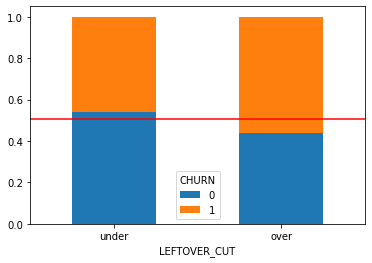

In [172]:
table = pd.crosstab(mobile["LEFTOVER_CUT"], mobile[target], normalize="index")
print(table)
table.plot.bar(stacked=True)
plt.axhline(1-target_mean, color='r')
plt.xticks(rotation=0)

plt.show()

In [173]:
table = pd.crosstab(mobile["LEFTOVER_CUT"], mobile[target])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f"카이제곱통계량 : {result[0]:.5f}, p-value : {result[1]}")

카이제곱통계량 : 166.58778, p-value : 4.115980395677852e-38


* 구간을 나누지 않았을 때 보다 강한상관관계이다.